## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project predicts the chances of having a heart stroke by looking at users input parameters


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?datasetId=1120859&sortBy=voteCount

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder

#### Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv('data/strokeprediction.csv')

#### Show Top 5 Records

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Shape of the dataset

In [13]:
df.shape

(5110, 12)

### 2.2 Dataset information

df.info()

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not   

### 3. Data Checks to perform

- Check Missing values and impute them
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [14]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### There are missing values in the data set in the bmi column

### 3.2 Dataset Information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Number of Strokes in the dataset

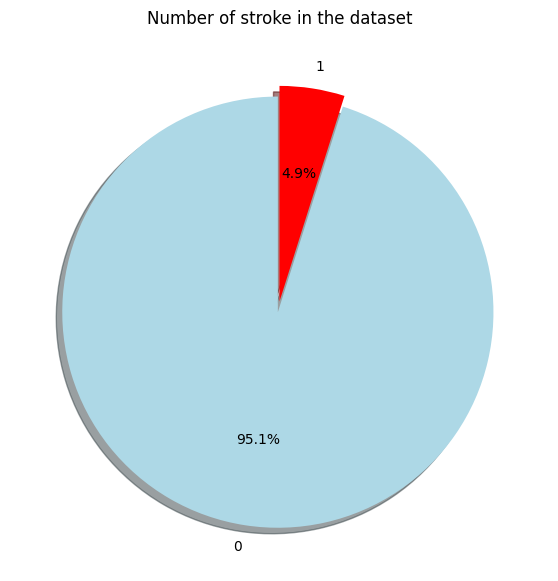

In [17]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

### 3.3 Label Encoder

In [21]:
#  Using Lable encoding
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


### 3.4 Checking the number of unique values of each column

In [22]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### 3.5 Check statistics of data set

In [23]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Insight
- From above description of numerical data, all means are very different from each other - between 0 and 206;
- All standard deviations are also - between 0.2 and 45;


### 3.7 Exploring Data

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'Residence_type' variable:  ",end=" ")
print(df['Residence_type'].unique())

print("Categories in 'smoking_status' variable:",end=" " )
print(df['smoking_status'].unique())

print("Categories in 'work_type' variable:     ",end=" " )
print(df['work_type'].unique())


Categories in 'gender' variable:      ['Male' 'Female' 'Other']
Categories in 'Residence_type' variable:   ['Urban' 'Rural']
Categories in 'smoking_status' variable: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Categories in 'work_type' variable:      ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [26]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [27]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Bar graph

#### 4.1.1 Histogram & Bar Graph

In [30]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

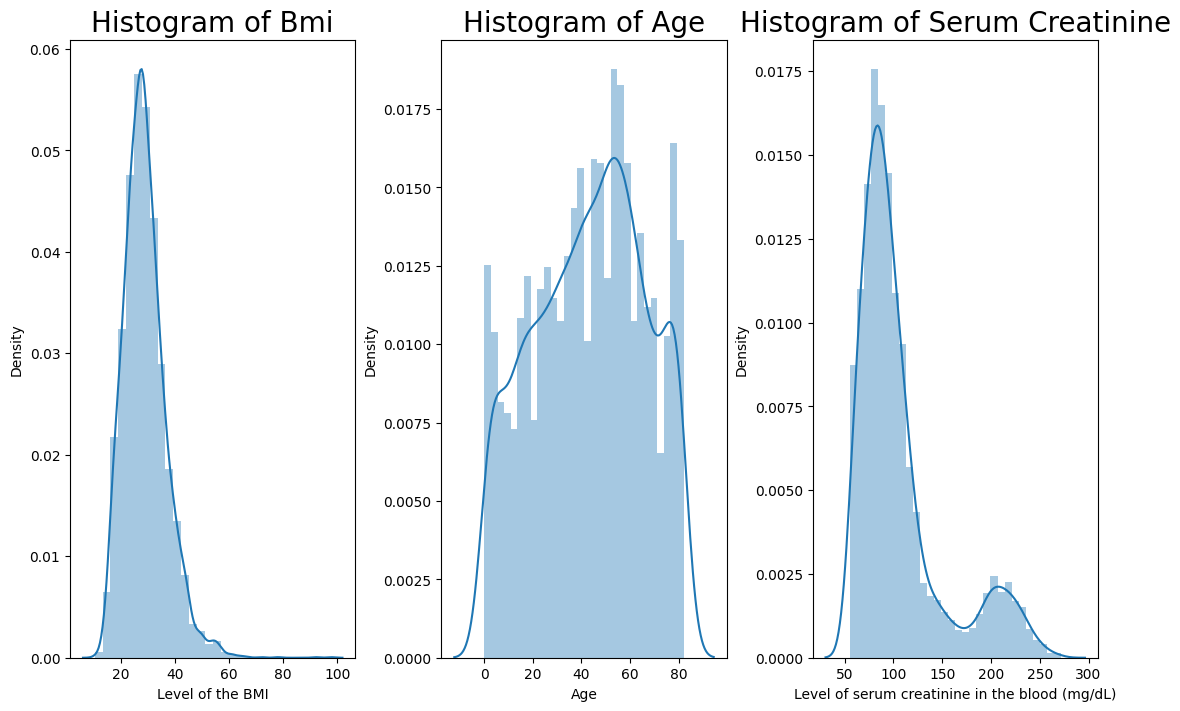

In [31]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(df.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(df.avg_glucose_level,
          title='Serum Creatinine', 
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()

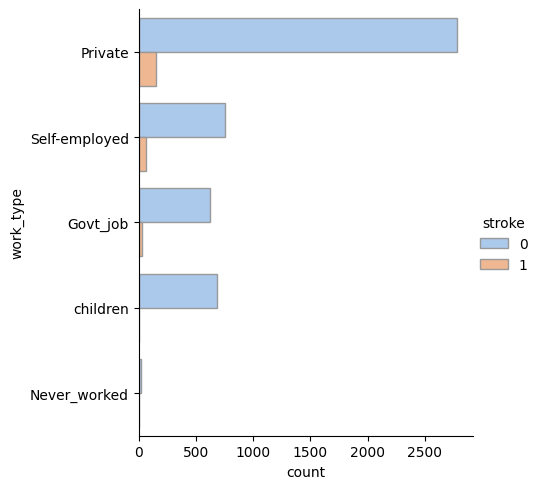

In [32]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

#####  Insights
- 1. In term of proportion private and self-employed have the similar amount of people having a stroke. However people from the gouvernment are more likely to not have a stroke compared to both first gategories moreover chlidren are not very likekly to get a stroke. Maybe that could be explain due to the degree of pressure felt by workers

- 2. Surprisingly, it seems that the stroke is not highly corralated to smokers since the proportion of person having a stroke is fairly the same among the different smoking status.

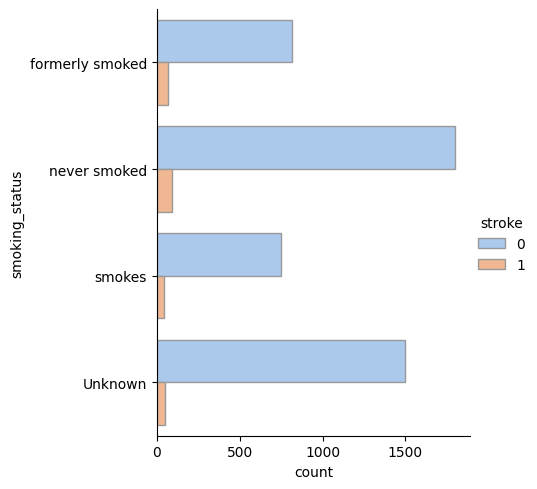

In [33]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

<Figure size 1700x700 with 0 Axes>

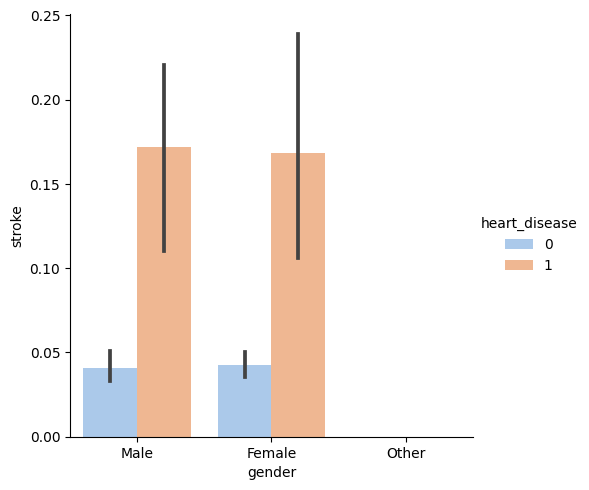

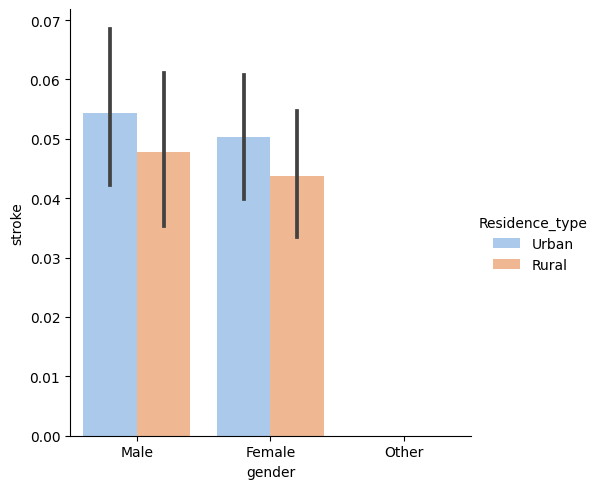

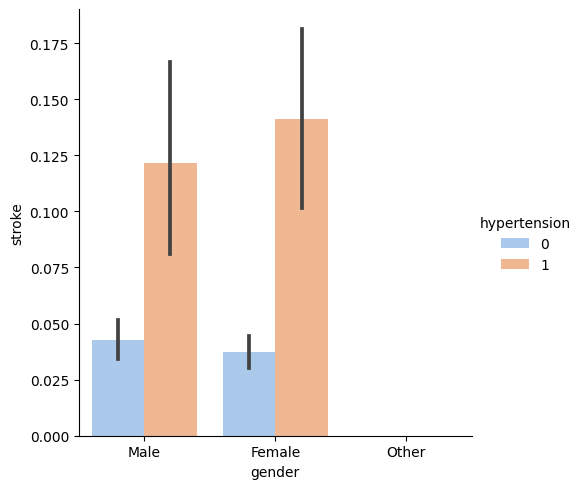

In [34]:
plt.figure(figsize=(17,7))
sns.catplot(x="gender", y="stroke", hue="heart_disease", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="Residence_type", palette="pastel", kind="bar", data=df)
sns.catplot(x="gender", y="stroke", hue="hypertension", palette="pastel", kind="bar", data=df)
plt.show()

#####  Insights
-  1. We can see from the plots that the gender is not a feature that descriminate a person having a stroke or not.

- 2. Hypertension and heart disease features are correlated to stroke as we could expect.

- 3. Rural person are less prone to strole than urban people, it seems that the polution is a correlatede to having stroke.

In [38]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### 4.2 Correlation with target feature

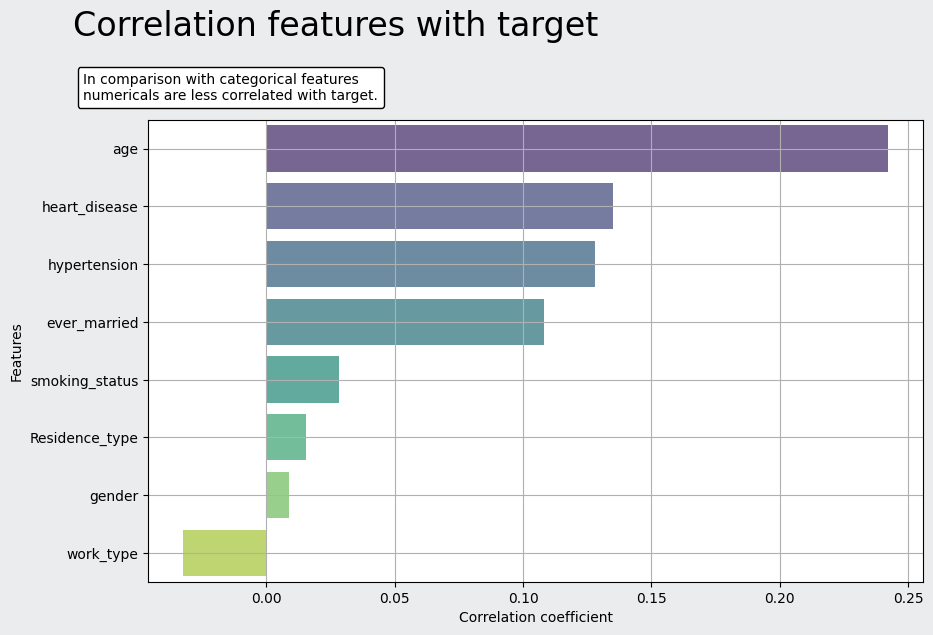

In [39]:

features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

#### 4.3 Heat map

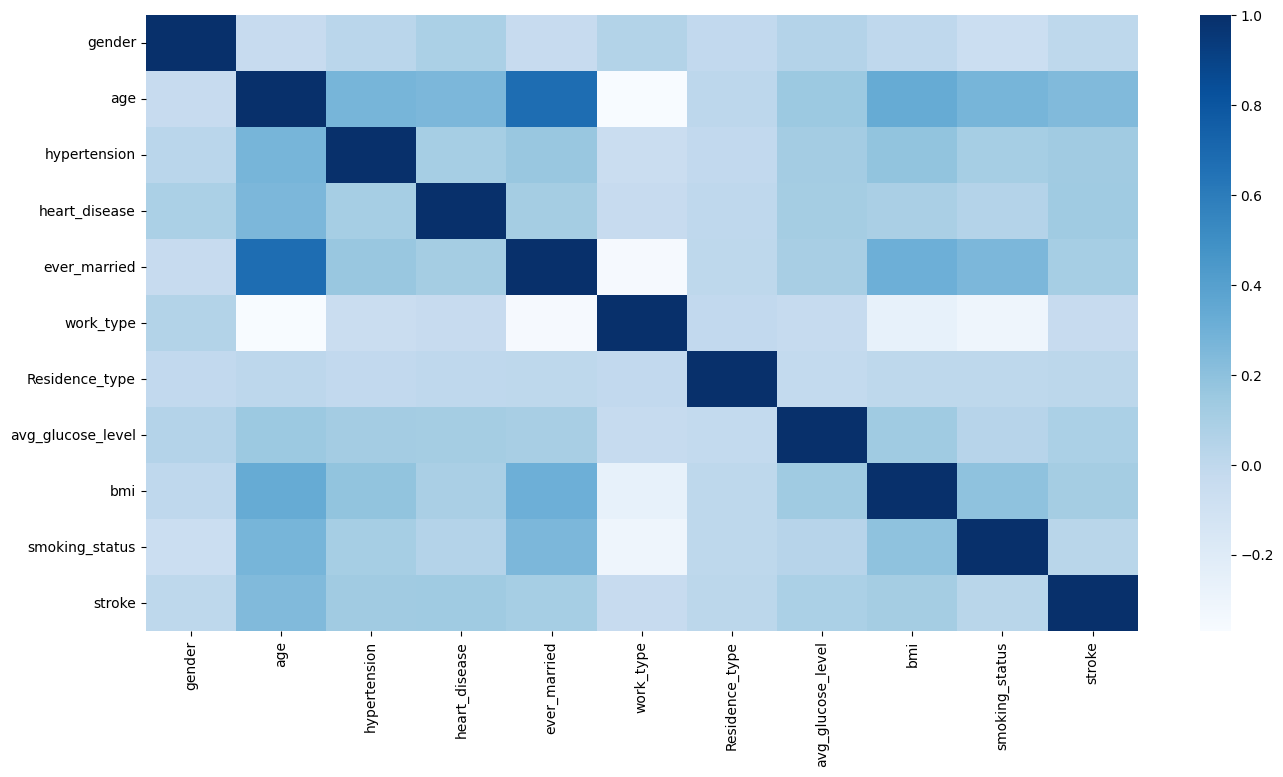

In [40]:
plt.figure(figsize=(16,8))
sns.heatmap(en_df.corr(),cmap="Blues");

#### Insights 
- age and ever-married
- bmi and ever-married
- bmi and age
are strongly correalted 

#### Feature Ranking

Feature ranking:
1. feature 1 (0.681038)
2. feature 7 (0.107527)
3. feature 5 (0.068106)
4. feature 3 (0.030871)
5. feature 0 (0.030857)
6. feature 2 (0.029756)
7. feature 6 (0.027659)
8. feature 4 (0.024185)


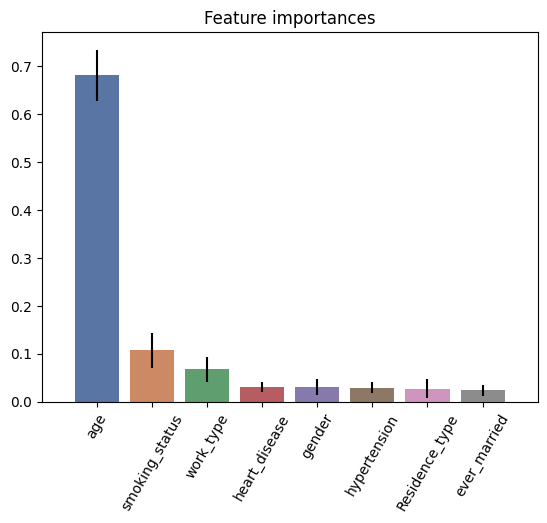

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

X = en_df[features]
y = en_df['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

##### In order to make the dataset balanced we will use the package SMOTE for oversampling. Moreover to fix the missing values in the BMI columns we use a imputation technics based on the KNN.

In [43]:
from sklearn.impute import KNNImputer
en_df_imputed = en_df
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df_imputed)

array([[  1.,  88.,   0., ..., 239.,   1.,   1.],
       [  0.,  82.,   0., ..., 418.,   2.,   1.],
       [  1., 101.,   0., ..., 198.,   2.,   1.],
       ...,
       [  0.,  56.,   0., ..., 179.,   2.,   0.],
       [  1.,  72.,   0., ..., 129.,   1.,   0.],
       [  0.,  65.,   0., ..., 135.,   0.,   0.]])

In [44]:
en_df_imputed.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64